>> Hospital Outcomes for Diabetic Patients A Machine Learning Approach <<

>> Project Overview:

Diabetes is a chronic health condition affecting millions globally, often requiring ongoing medical attention and hospital care. In this project, I am going to  analyze a real-world dataset collected from 130 U.S. hospitals over a span of 10 years (1999–2008) to predict whether a diabetic patient is likely to be readmitted to the hospital.
The goal is to build a classification model that can effectively identify high-risk patients, enabling better clinical decision-making and resource allocation.
The project involves data preprocessing, exploratory data analysis (EDA), feature engineering, and the application of machine learning algorithms.
Through this work, we aim to contribute to healthcare analytics by providing a data-driven approach to improve patient outcomes and reduce readmission rates.

>> Objectives:

Understand the key factors influencing hospital readmission in diabetic patients.
Perform thorough EDA to uncover trends and correlations.
Build and evaluate classification models (e.g., Logistic Regression, Random Forest, etc.).
Provide actionable insights for healthcare practitioners.


In [6]:
 # importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer

In [7]:
#loading the data set 
file_path1 =r"C:\Users\JOJO\Downloads\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv"# dataset is taken from the UCI Repository
file_path2 =r"C:\Users\JOJO\Downloads\diabetes+130-us+hospitals+for+years+1999-2008\IDS_mapping.csv"#  two csv  files are there to work 
df1 = pd.read_csv(file_path1) 
df2 = pd.read_csv(file_path2)
#trying to  combine  both df to one dataframe so that we can easliy use it 
data = pd.concat([df1, df2], ignore_index=True)
data['Target'] = data.readmitted
# Displaying the first few rows to check
data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description,Target
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6,25.0,1.0,1.0,...,No,No,No,No,No,No,No,NO,NaN,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1,1.0,7.0,3.0,...,No,No,No,No,No,Ch,Yes,>30,NaN,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1,1.0,7.0,2.0,...,No,No,No,No,No,No,Yes,NO,NaN,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1,1.0,7.0,2.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1,1.0,7.0,1.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
5,35754.0,82637451.0,Caucasian,Male,[50-60),?,2,1.0,2.0,3.0,...,No,No,No,No,No,No,Yes,>30,NaN,>30
6,55842.0,84259809.0,Caucasian,Male,[60-70),?,3,1.0,2.0,4.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
7,63768.0,114882984.0,Caucasian,Male,[70-80),?,1,1.0,7.0,5.0,...,No,No,No,No,No,No,Yes,>30,NaN,>30
8,12522.0,48330783.0,Caucasian,Female,[80-90),?,2,1.0,4.0,13.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
9,15738.0,63555939.0,Caucasian,Female,[90-100),?,3,3.0,4.0,12.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO


In [8]:
df= pd.DataFrame(data)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description,Target
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6,25.0,1.0,1.0,...,No,No,No,No,No,No,No,NO,NaN,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1,1.0,7.0,3.0,...,No,No,No,No,No,Ch,Yes,>30,NaN,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1,1.0,7.0,2.0,...,No,No,No,No,No,No,Yes,NO,NaN,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1,1.0,7.0,2.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1,1.0,7.0,1.0,...,No,No,No,No,No,Ch,Yes,NO,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101828,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transfer from hospital inpt/same fac reslt in...,NaN
101829,NaN,NaN,NaN,NaN,NaN,NaN,23,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Born inside this hospital,NaN
101830,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Born outside this hospital,NaN
101831,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transfer from Ambulatory Surgery Center,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101833 entries, 0 to 101832
Data columns (total 52 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101766 non-null  float64
 1   patient_nbr               101766 non-null  float64
 2   race                      101766 non-null  object 
 3   gender                    101766 non-null  object 
 4   age                       101766 non-null  object 
 5   weight                    101766 non-null  object 
 6   admission_type_id         101831 non-null  object 
 7   discharge_disposition_id  101766 non-null  float64
 8   admission_source_id       101766 non-null  float64
 9   time_in_hospital          101766 non-null  float64
 10  payer_code                101766 non-null  object 
 11  medical_specialty         101766 non-null  object 
 12  num_lab_procedures        101766 non-null  float64
 13  num_procedures            101766 non-null  f

In [14]:
df.isnull().sum()

encounter_id                    67
patient_nbr                     67
race                            67
gender                          67
age                             67
weight                          67
admission_type_id                2
discharge_disposition_id        67
admission_source_id             67
time_in_hospital                67
payer_code                      67
medical_specialty               67
num_lab_procedures              67
num_procedures                  67
num_medications                 67
number_outpatient               67
number_emergency                67
number_inpatient                67
diag_1                          67
diag_2                          67
diag_3                          67
number_diagnoses                67
max_glu_serum                96487
A1Cresult                    84815
metformin                       67
repaglinide                     67
nateglinide                     67
chlorpropamide                  67
glimepiride         

In [16]:
# as we have missing values we need to fill in missing values with the mean, median, mode, or a constant value.
#Impute missing values

numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [18]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [20]:
df.describe()

,encounter_id,patient_nbr,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.018330e+05,1.018330e+05,101833.000000,101833.000000,101833.000000,101833.000000,101833.000000,101833.000000,101833.000000,101833.000000,101833.000000,101833.000000
mean,1.652016e+08,5.433040e+07,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026065e+08,3.868363e+07,5.278428,4.062744,2.984126,19.667889,1.705246,8.124892,1.266848,0.930166,1.262448,1.932964
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.502533e+07,2.341484e+07,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.524377e+08,4.553063e+07,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302185e+08,8.752774e+07,3.715642,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [22]:
df.shape

(101833, 52)

In [24]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'description', 'Target'],
      dtype='object')

In [26]:
df.duplicated().sum()

1

In [28]:
df.drop_duplicates()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description,Target
0,2.278392e+06,8.222157e+06,Caucasian,Female,[0-10),?,6,25.000000,1.000000,1.000000,...,No,No,No,No,No,No,No,NO,Not Available,NO
1,1.491900e+05,5.562919e+07,Caucasian,Female,[10-20),?,1,1.000000,7.000000,3.000000,...,No,No,No,No,No,Ch,Yes,>30,Not Available,>30
2,6.441000e+04,8.604788e+07,AfricanAmerican,Female,[20-30),?,1,1.000000,7.000000,2.000000,...,No,No,No,No,No,No,Yes,NO,Not Available,NO
3,5.003640e+05,8.244238e+07,Caucasian,Male,[30-40),?,1,1.000000,7.000000,2.000000,...,No,No,No,No,No,Ch,Yes,NO,Not Available,NO
4,1.668000e+04,4.251927e+07,Caucasian,Male,[40-50),?,1,1.000000,7.000000,1.000000,...,No,No,No,No,No,Ch,Yes,NO,Not Available,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101828,1.652016e+08,5.433040e+07,Caucasian,Female,[70-80),?,22,3.715642,5.754437,4.395987,...,No,No,No,No,No,No,Yes,NO,Transfer from hospital inpt/same fac reslt in...,NO
101829,1.652016e+08,5.433040e+07,Caucasian,Female,[70-80),?,23,3.715642,5.754437,4.395987,...,No,No,No,No,No,No,Yes,NO,Born inside this hospital,NO
101830,1.652016e+08,5.433040e+07,Caucasian,Female,[70-80),?,24,3.715642,5.754437,4.395987,...,No,No,No,No,No,No,Yes,NO,Born outside this hospital,NO
101831,1.652016e+08,5.433040e+07,Caucasian,Female,[70-80),?,25,3.715642,5.754437,4.395987,...,No,No,No,No,No,No,Yes,NO,Transfer from Ambulatory Surgery Center,NO


In [30]:
num_column = df.select_dtypes(include= ['number']).columns

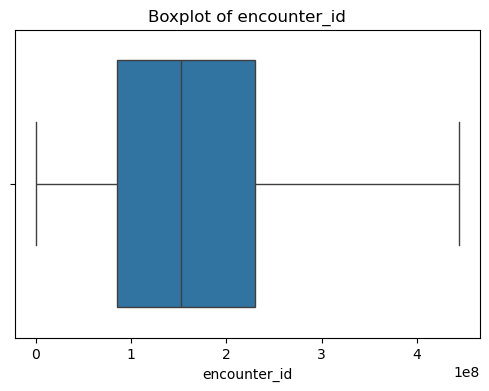

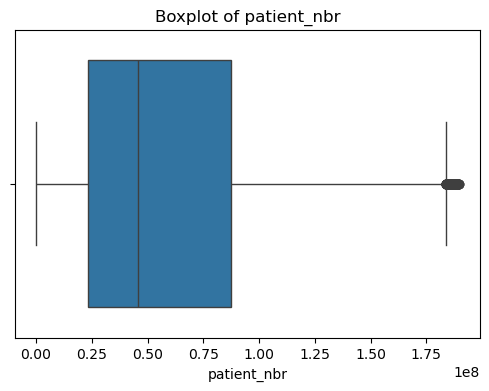

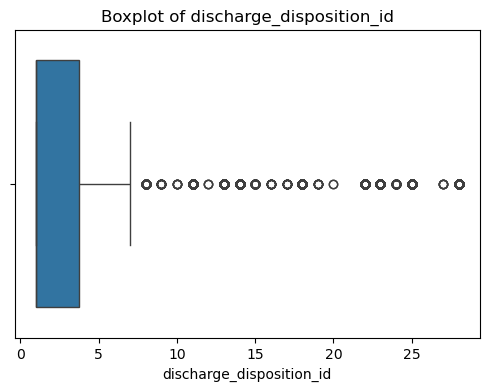

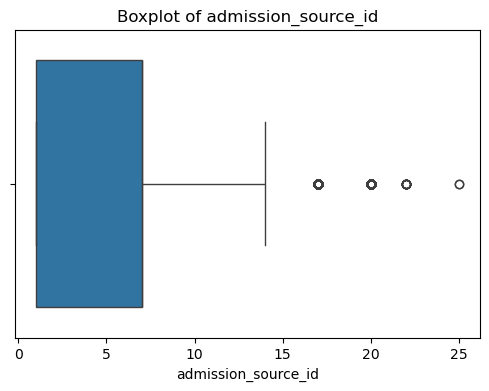

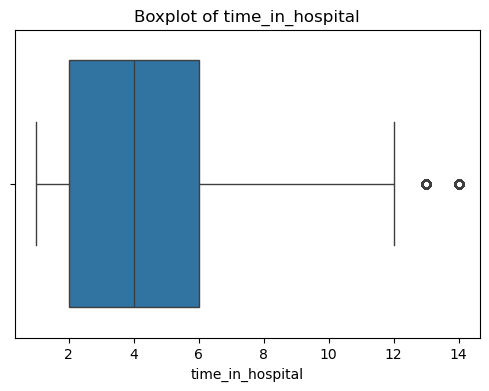

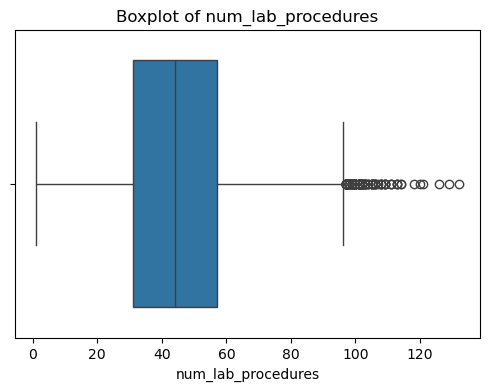

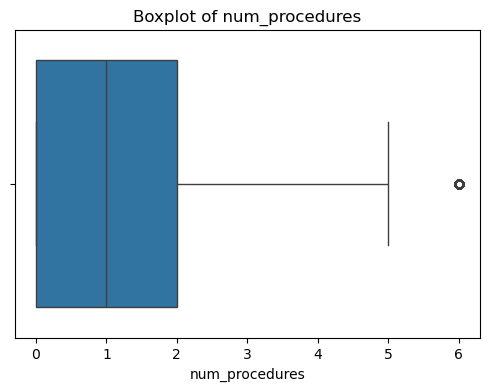

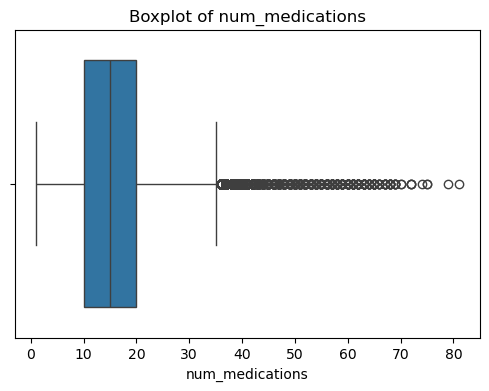

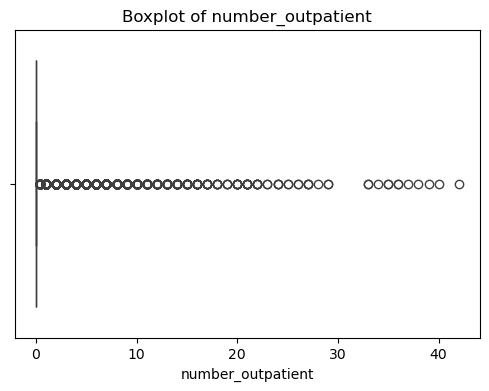

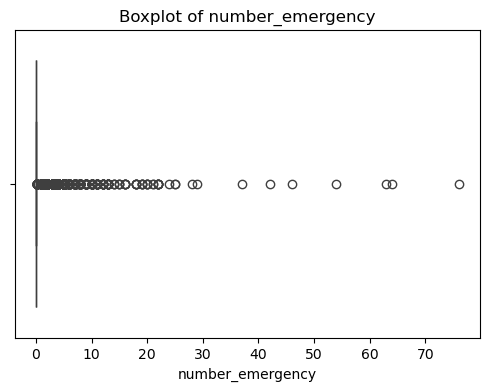

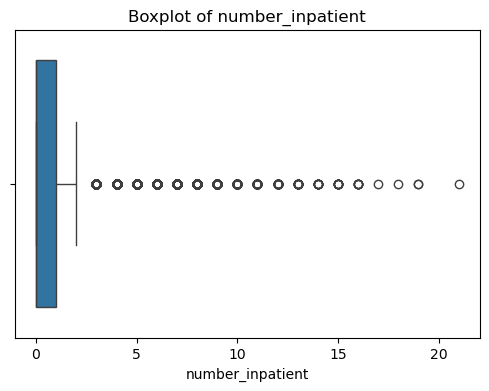

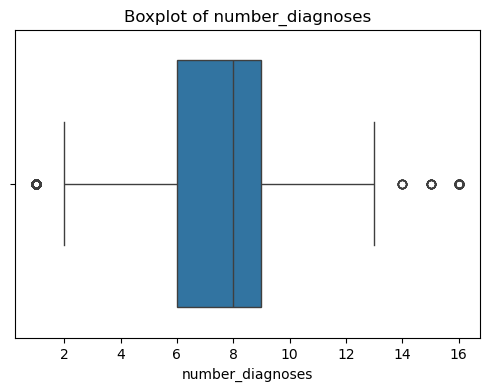

In [32]:
#outliears
num_columns = df.select_dtypes(include=['number']).columns

for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [33]:
#correcting outliears
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df 

In [34]:
df1 = outliers(df)

In [37]:
df1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description,Target
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6,7.789104,1.0,1.0,...,No,No,No,No,No,No,No,NO,Not Available,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1,1.000000,7.0,3.0,...,No,No,No,No,No,Ch,Yes,>30,Not Available,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1,1.000000,7.0,2.0,...,No,No,No,No,No,No,Yes,NO,Not Available,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1,1.000000,7.0,2.0,...,No,No,No,No,No,Ch,Yes,NO,Not Available,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1,1.000000,7.0,1.0,...,No,No,No,No,No,Ch,Yes,NO,Not Available,NO


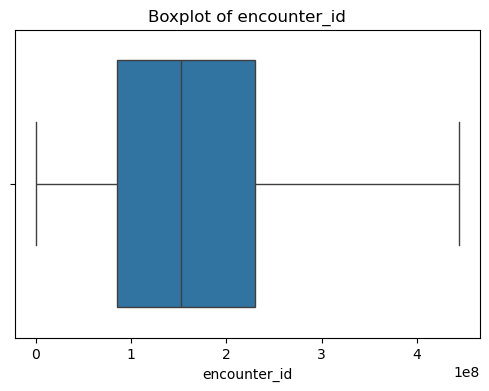

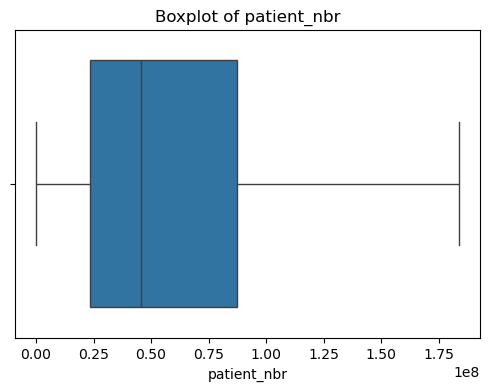

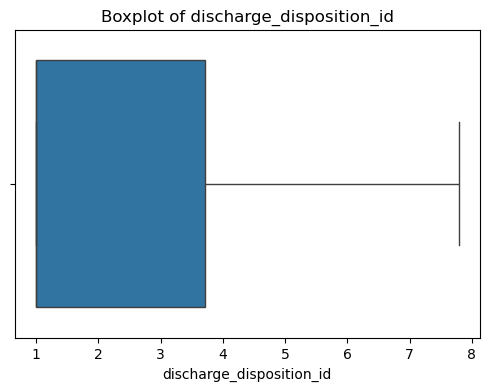

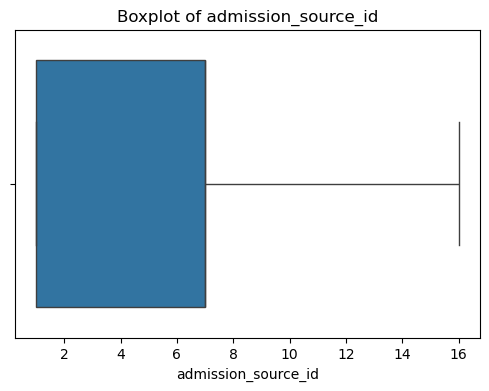

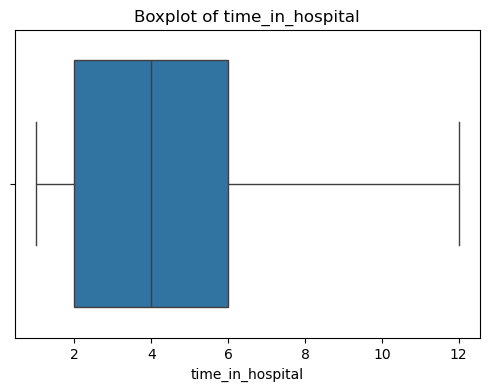

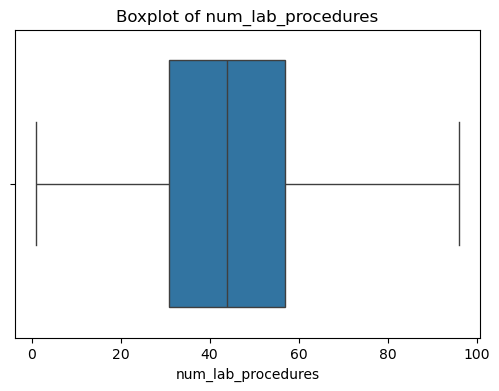

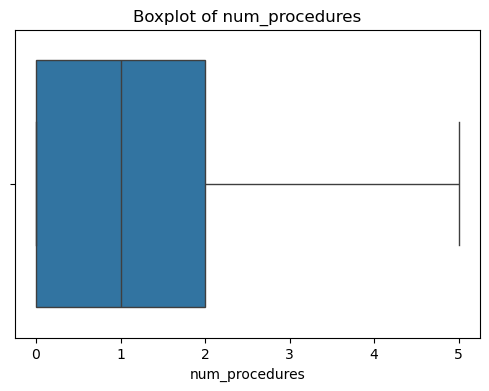

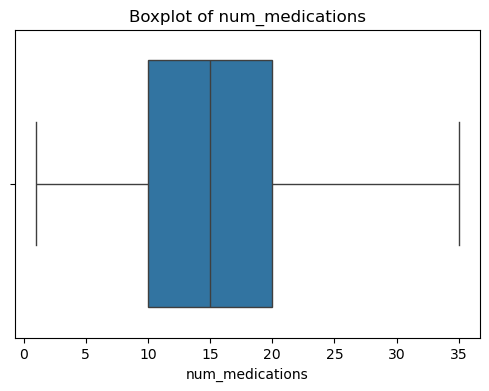

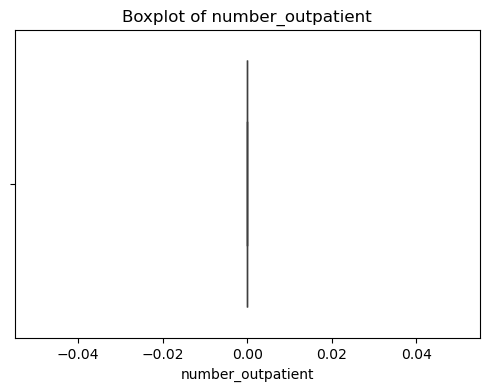

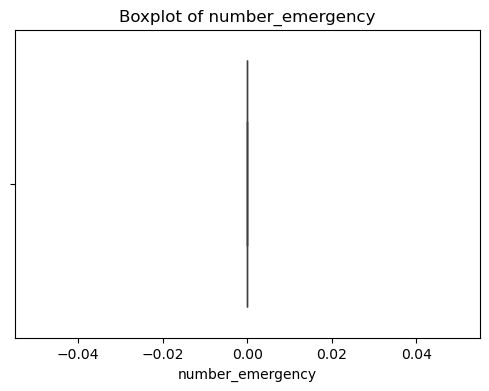

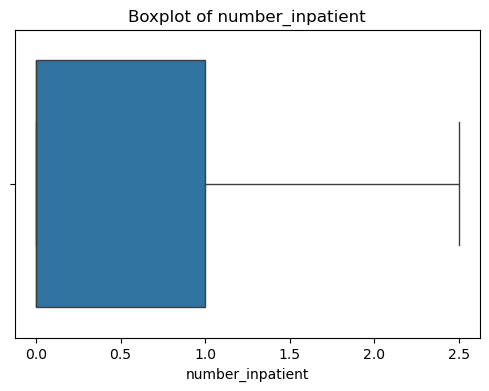

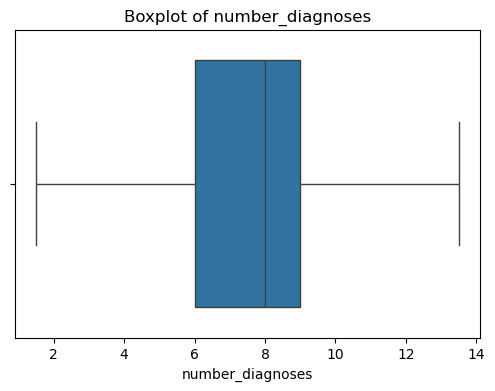

In [40]:
num_columns = df1.select_dtypes(include=['number']).columns

for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df1, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [41]:
le = LabelEncoder() # simple male=0 female= 1
df1['gender'] = le.fit_transform(df1['gender'])


In [42]:
#onehot encoding
df.columns = df.columns.str.strip() 
df = pd.get_dummies(df, columns=['admission_type_id'])

In [46]:
df1.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description,Target
0,2278392.0,8222157.0,Caucasian,0,[0-10),?,6,7.789104,1.0,1.0,...,No,No,No,No,No,No,No,NO,Not Available,NO
1,149190.0,55629189.0,Caucasian,0,[10-20),?,1,1.000000,7.0,3.0,...,No,No,No,No,No,Ch,Yes,>30,Not Available,>30
2,64410.0,86047875.0,AfricanAmerican,0,[20-30),?,1,1.000000,7.0,2.0,...,No,No,No,No,No,No,Yes,NO,Not Available,NO
3,500364.0,82442376.0,Caucasian,1,[30-40),?,1,1.000000,7.0,2.0,...,No,No,No,No,No,Ch,Yes,NO,Not Available,NO
4,16680.0,42519267.0,Caucasian,1,[40-50),?,1,1.000000,7.0,1.0,...,No,No,No,No,No,Ch,Yes,NO,Not Available,NO
5,35754.0,82637451.0,Caucasian,1,[50-60),?,2,1.000000,2.0,3.0,...,No,No,No,No,No,No,Yes,>30,Not Available,>30
6,55842.0,84259809.0,Caucasian,1,[60-70),?,3,1.000000,2.0,4.0,...,No,No,No,No,No,Ch,Yes,NO,Not Available,NO
7,63768.0,114882984.0,Caucasian,1,[70-80),?,1,1.000000,7.0,5.0,...,No,No,No,No,No,No,Yes,>30,Not Available,>30
8,12522.0,48330783.0,Caucasian,0,[80-90),?,2,1.000000,4.0,12.0,...,No,No,No,No,No,Ch,Yes,NO,Not Available,NO
9,15738.0,63555939.0,Caucasian,0,[90-100),?,3,3.000000,4.0,12.0,...,No,No,No,No,No,Ch,Yes,NO,Not Available,NO


In [48]:
# checking for skewness
X = df1.drop('readmitted', axis =1)
y =df1['readmitted']

In [50]:
X.skew

<bound method DataFrame.skew of         encounter_id   patient_nbr             race  gender      age weight  \
0       2.278392e+06  8.222157e+06        Caucasian       0   [0-10)      ?   
1       1.491900e+05  5.562919e+07        Caucasian       0  [10-20)      ?   
2       6.441000e+04  8.604788e+07  AfricanAmerican       0  [20-30)      ?   
3       5.003640e+05  8.244238e+07        Caucasian       1  [30-40)      ?   
4       1.668000e+04  4.251927e+07        Caucasian       1  [40-50)      ?   
...              ...           ...              ...     ...      ...    ...   
101828  1.652016e+08  5.433040e+07        Caucasian       0  [70-80)      ?   
101829  1.652016e+08  5.433040e+07        Caucasian       0  [70-80)      ?   
101830  1.652016e+08  5.433040e+07        Caucasian       0  [70-80)      ?   
101831  1.652016e+08  5.433040e+07        Caucasian       0  [70-80)      ?   
101832  1.652016e+08  5.433040e+07        Caucasian       0  [70-80)      ?   

       admission_ty

In [52]:
pt = PowerTransformer(method = 'yeo-johnson')

In [54]:
num_columns = df1.select_dtypes(include=['number']).columns

In [56]:
df1[num_columns] = pt.fit_transform(df1[num_columns])
print(df1[num_columns].skew())

encounter_id               -0.067868
patient_nbr                -0.285679
gender                      0.152075
discharge_disposition_id    0.503433
admission_source_id        -0.088230
time_in_hospital            0.008703
num_lab_procedures         -0.232307
num_procedures              0.195317
num_medications            -0.009316
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.722468
number_diagnoses           -0.328811
dtype: float64


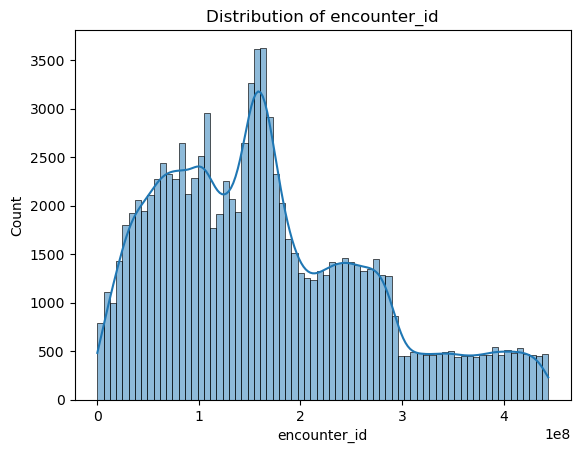

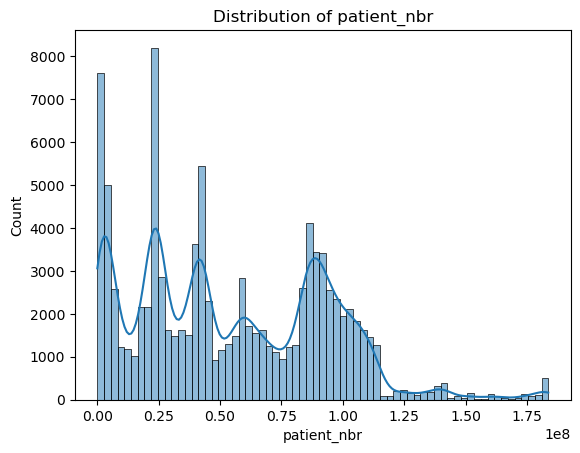

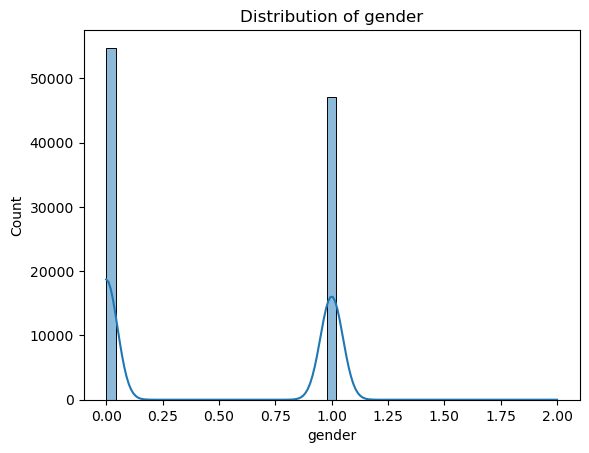

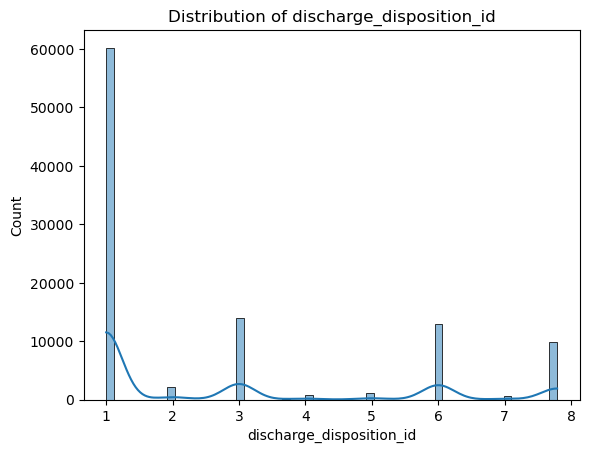

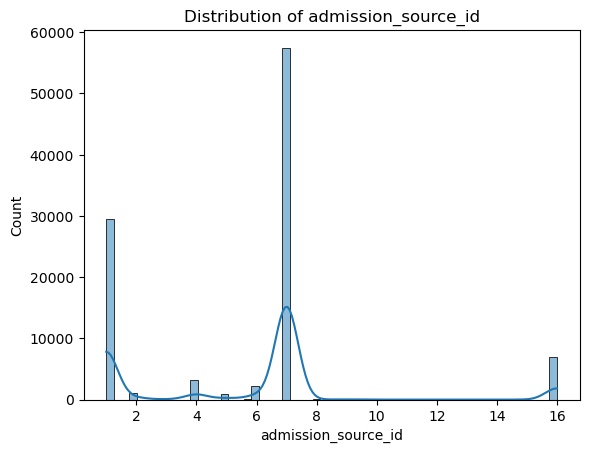

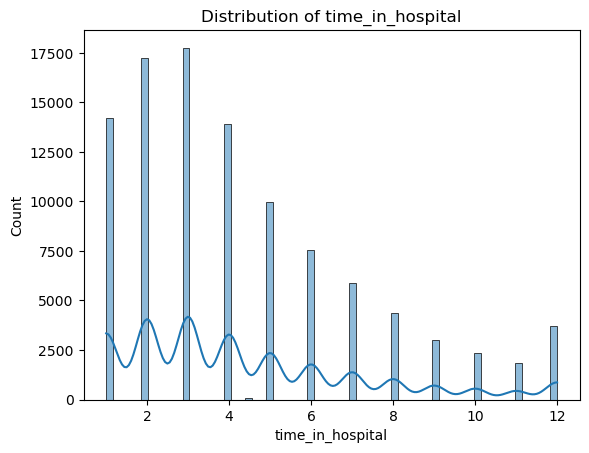

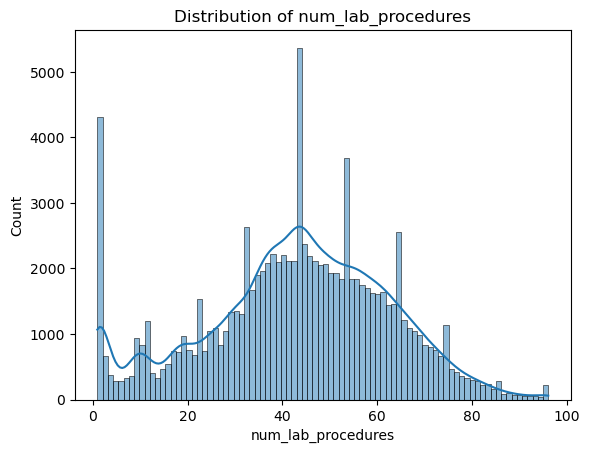

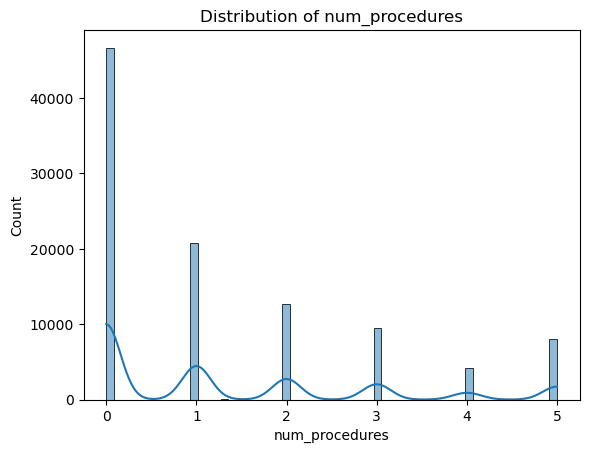

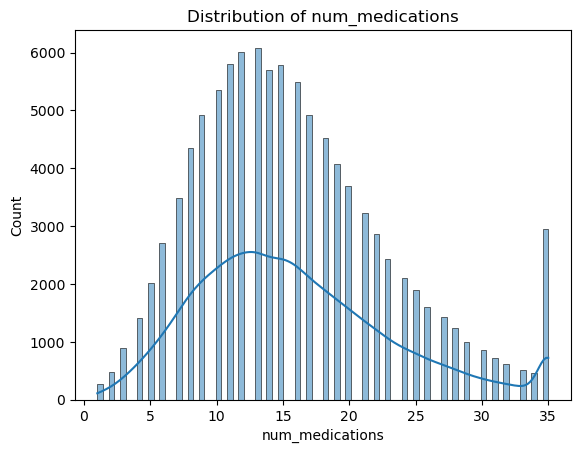

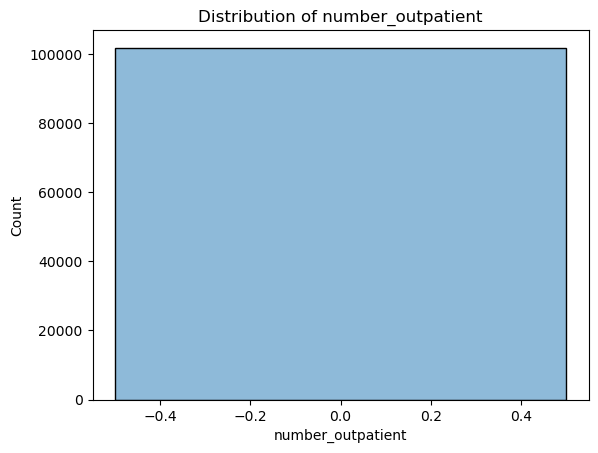

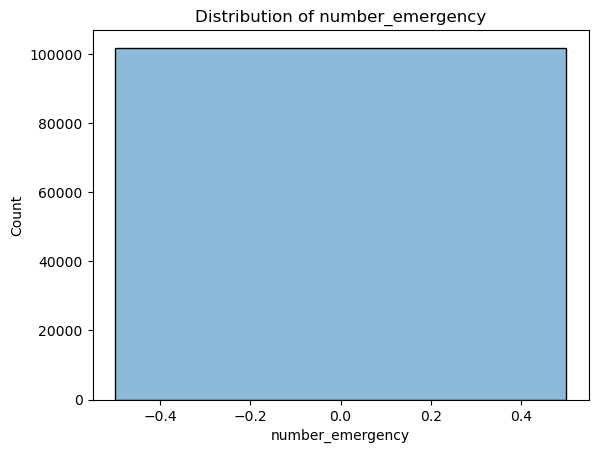

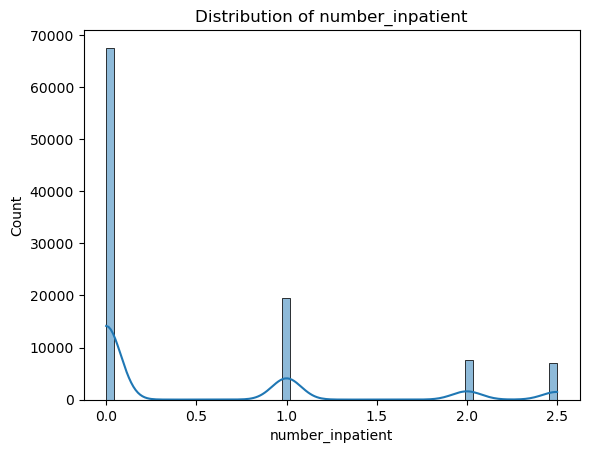

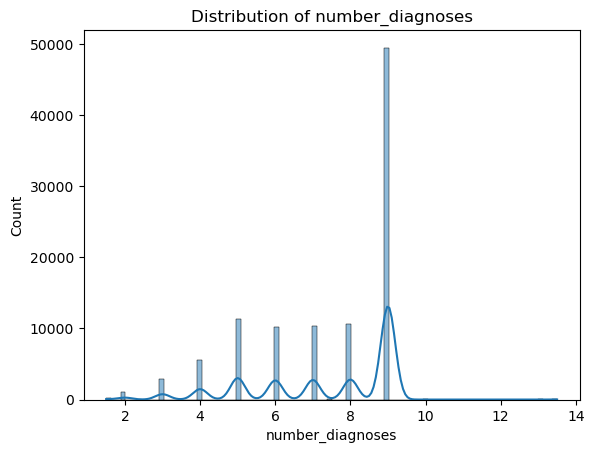

In [57]:
for i in num_columns:
    sns.histplot(data =X,x=i,kde=True)
    plt.title(f"Distribution of {i}")
    plt.show()

In [59]:
df1.replace('?', np.nan, inplace=True)

In [60]:
df1 = df1.apply(pd.to_numeric, errors='coerce')

In [61]:
cor = df1.corr()
print(cor)

                          encounter_id  patient_nbr  race    gender  age  \
encounter_id                  1.000000     0.562278   NaN  0.004045  NaN   
patient_nbr                   0.562278     1.000000   NaN  0.008781  NaN   
race                               NaN          NaN   NaN       NaN  NaN   
gender                        0.004045     0.008781   NaN  1.000000  NaN   
age                                NaN          NaN   NaN       NaN  NaN   
weight                             NaN          NaN   NaN       NaN  NaN   
admission_type_id            -0.164864     0.008688   NaN  0.009862  NaN   
discharge_disposition_id     -0.053010    -0.025709   NaN -0.056837  NaN   
admission_source_id          -0.082420    -0.000986   NaN -0.008234  NaN   
time_in_hospital             -0.059471    -0.021462   NaN -0.039277  NaN   
payer_code                         NaN          NaN   NaN       NaN  NaN   
medical_specialty                  NaN          NaN   NaN       NaN  NaN   
num_lab_proc

<Axes: >

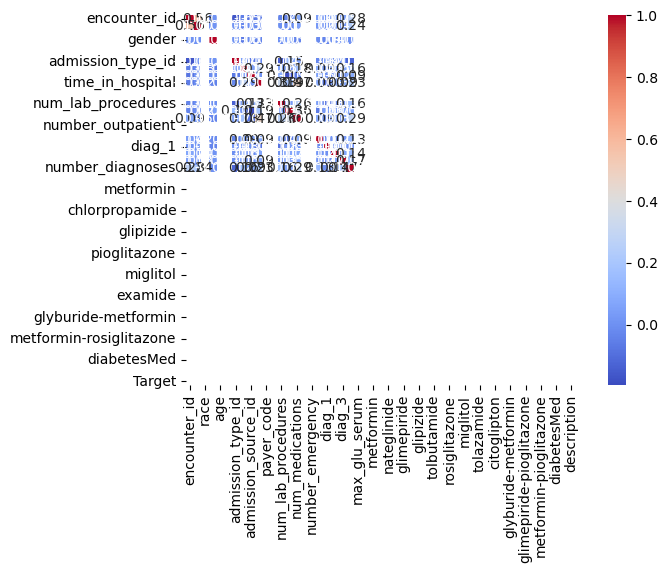

In [62]:
#Heatmap
sns.heatmap(cor,annot= True,cmap = 'coolwarm',fmt = ".2f")

In [64]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include='object'):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))


In [66]:
#feature selection
from sklearn.feature_selection import SelectKBest,f_classif

In [67]:
sk = SelectKBest(score_func=f_classif,k=10)

In [68]:
k_best = sk.fit_transform(X,y)

C:\Users\JOJO\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [15 16 39 40 50] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\JOJO\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\JOJO\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [78]:
selected_features = X.columns[sk.get_support()]

In [80]:
selected_features

Index(['patient_nbr', 'discharge_disposition_id', 'time_in_hospital',
       'medical_specialty', 'num_medications', 'number_inpatient',
       'number_diagnoses', 'change', 'diabetesMed', 'Target'],
      dtype='object')

In [82]:
feature_score = pd.DataFrame({
    'Features' : X.columns,
    'Score'    : sk.scores_ }).sort_values(by= 'Score',ascending = False)

In [84]:
feature_score

,Features,Score
50,Target,inf
17,number_inpatient,3147.811111
21,number_diagnoses,658.997308
1,patient_nbr,306.975745
48,diabetesMed,191.876079
14,num_medications,190.387612
9,time_in_hospital,177.567623
7,discharge_disposition_id,162.495229
11,medical_specialty,126.185828
47,change,110.753207


In [86]:
X_sel = X[selected_features]

In [88]:
X_sel.columns

Index(['patient_nbr', 'discharge_disposition_id', 'time_in_hospital',
       'medical_specialty', 'num_medications', 'number_inpatient',
       'number_diagnoses', 'change', 'diabetesMed', 'Target'],
      dtype='object')

In [90]:
sc = StandardScaler()

In [92]:
X.scaled = sc.fit_transform(X_sel)

C:\Users\JOJO\AppData\Local\Temp\ipykernel_14008\442373628.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.scaled = sc.fit_transform(X_sel)


In [94]:
X_train,X_test,y_train,y_test = train_test_split(X.scaled,y,test_size =0.2,random_state= 42)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [100]:
# Example: drop 'outcome' if it's the same as y
X = X.drop(columns=['target', 'outcome'], errors='ignore')


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transform, not fit


In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [106]:
print(y.value_counts())


readmitted
NO     54931
>30    35545
<30    11357
Name: count, dtype: int64


In [118]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}


In [ ]:
from sklearn.metrics import accuracy_score

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
results = {}

for model_name, model in models.items():
    #training
    model.fit(X_train,y_train)

    #predicting
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test,y_pred)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification Report
    cr = classification_report(y_test, y_pred)

    # Store results in Dictionary
    results[model_name] = {
         "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

In [ ]:
# Print the results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [159]:
import joblib #saving model

In [161]:
pipeline = Pipeline([
    ('impluter',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler()),
    ('model',RandomForestClassifier())])

In [163]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('impluter', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [165]:
y_pred = pipeline.predict(X_test)